In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
# Load dataset (update path if needed)
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Encode categorical columns
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Features and Target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

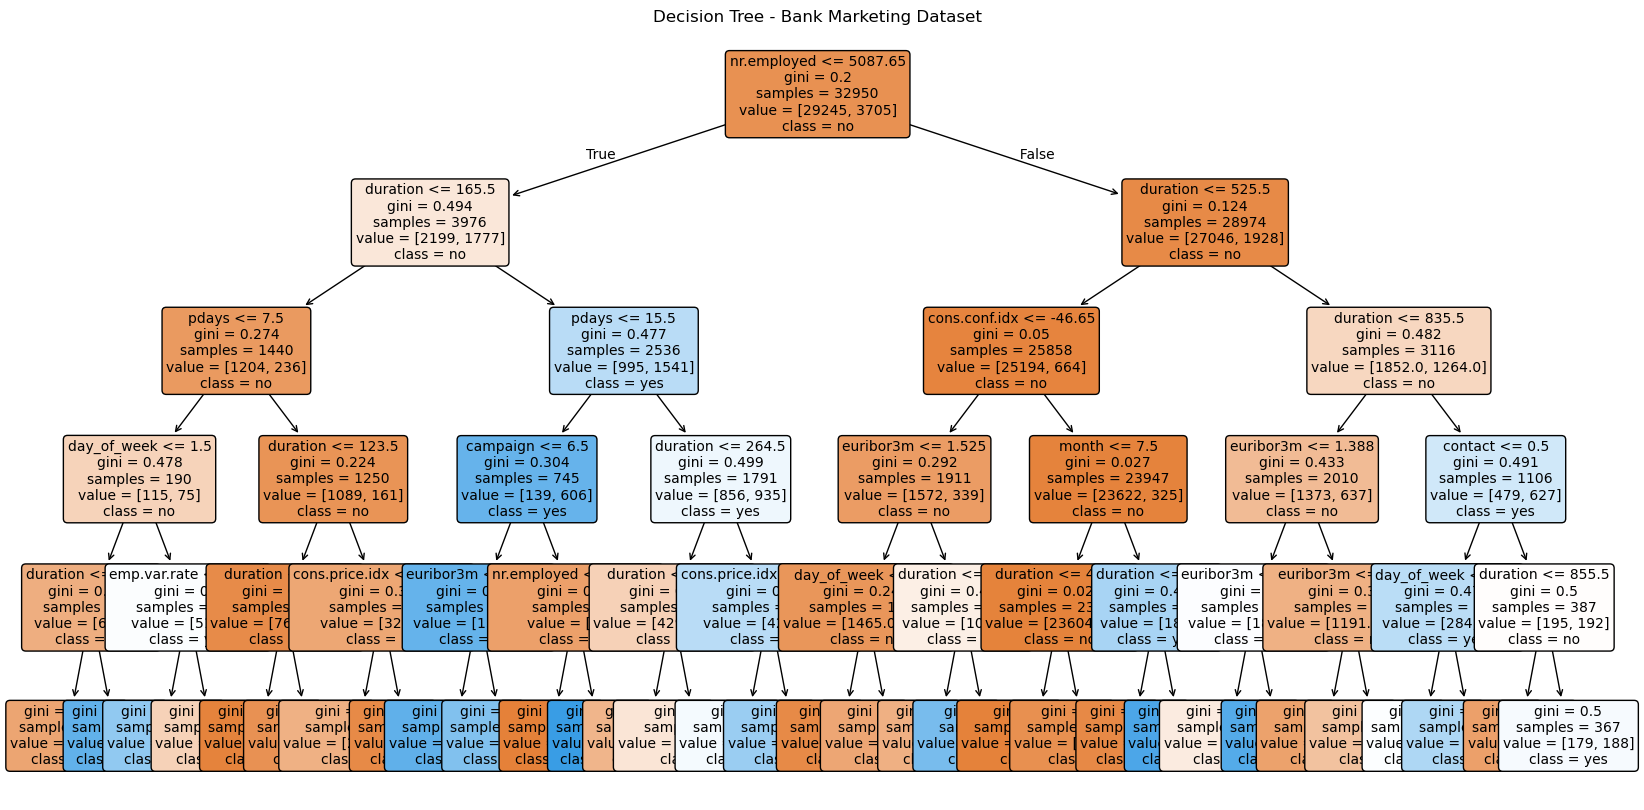

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=label_encoders['y'].classes_, 
          filled=True, 
          rounded=True, 
          fontsize=10)

plt.title("Decision Tree - Bank Marketing Dataset")
plt.show()